<a href="https://colab.research.google.com/github/vinaysonare/Data-Science-Projects/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Task1: Credit Card Fraud Detection with OverSampling**

In [ ]:
 #Gettiting data from csv stored in Google drive and converting it into dataframe
creditcard_df = pd.read_csv('/content/drive/MyDrive/Guvi/Sample Datasets/creditcard.csv')
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Now splitting dependent and independent variable After performing scaling process
# Performing scaling process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(creditcard_df.drop('Class', axis = 1))
scaled_features = scaler.transform(creditcard_df.drop('Class', axis = 1))
x = scaled_features  #skipped 0 and one because of id and diagnosis
y = creditcard_df['Class'] # took only diagnosis column
x,y

(array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
         -0.06378115,  0.24496426],
        [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
          0.04460752, -0.34247454],
        [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
         -0.18102083,  1.16068593],
        ...,
        [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
         -0.0804672 , -0.0818393 ],
        [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
          0.31668678, -0.31324853],
        [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
          0.04134999,  0.51435531]]), 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 284802    0
 284803    0
 284804    0
 284805    0
 284806    0
 Name: Class, Length: 284807, dtype: int64)

In [ ]:
# Resampleing by oversampling
from imblearn.over_sampling import RandomOverSampler
smk = RandomOverSampler(ratio=0.5)
xres,yres=smk.fit_sample(x,y) 
xres,yres

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
         -0.06378115,  0.24496426],
        [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
          0.04460752, -0.34247454],
        [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
         -0.18102083,  1.16068593],
        ...,
        [ 0.5009499 , -3.40901499,  3.34844073, ...,  0.69010111,
          4.45945269,  0.07012795],
        [ 0.94765164, -0.20196238, -0.45527129, ...,  0.88411251,
          0.09728921, -0.35047071],
        [-0.62027924,  0.60954752, -0.34583846, ..., -0.07103282,
         -0.0185166 , -0.22565046]]), array([0, 0, 0, ..., 1, 1, 1]))

In [ ]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xres,yres,train_size = 0.9999,random_state = 50)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((426429, 30), (43, 30), (426429,), (43,))

In [ ]:
#Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#predictin from test data
y_predicted =  knn.predict(x_test)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
#To check prediction report and find advisable K value
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        11

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [ ]:
#Now finding accuracy rate for say 50 k values from 1 to 50: Import cross value score 
from sklearn.model_selection import cross_val_score

feature_df = pd.DataFrame(scaled_features,columns=creditcard_df.columns[:-1]) #For checking accuracy rate and error rate  
accuracy_rate = []
error_rate = []
for i in range(1,5):
  kn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(kn,feature_df,y,cv = 10)
  accuracy_rate.append(score.mean())
for i in range(1,5):
  kn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(kn,feature_df,y,cv = 10)
  error_rate.append(1 - score.mean())

In [ ]:
#Plotting graph between accuracy rate and error rate
plt.figure(figsize=(20,6))
plt.plot(range(1,50),accuracy_rate,color ='blue',marker ='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [ ]:
#Plotting graph between accuracy rate and error rate
plt.figure(figsize=(20,6))
plt.plot(range(1,50),error_rate,color ='blue',marker ='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

*Hence Looking into error rate graph K value can be *

In [ ]:
#Now Fitting as per new k value
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(x_train,y_train)
#predictin from test data
y_predicted =  knn.predict(x_test)
print(classification_report(y_test,y_predicted))

**Task2: Breast Cancer Dataset task**

In [ ]:
 #Gettiting data from csv stored in Google drive and converting it into dataframe
url='https://drive.google.com/file/d/10nlpUpTKVAs6bdFW2LeEtFV-iD1w9sRU/view?usp=sharing'
file_id=url.split('/')[-2]
file_url='https://drive.google.com/uc?id=' + file_id
breast_cancer_df = pd.read_csv(file_url)
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Dropping column with NaN data
breast_cancer_df=breast_cancer_df.drop('Unnamed: 32',axis = 1)

In [ ]:
#Now splitting dependent and independent variable After performing scaling process
# Performing scaling process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(breast_cancer_df.drop('diagnosis', axis = 1))
scaled_features = scaler.transform(breast_cancer_df.drop('diagnosis', axis = 1))
x = scaled_features  #skipped 0 and one because of id and diagnosis
y = breast_cancer_df['diagnosis'] # took only diagnosis column
#Mapping M to 1 and B to 0
y = y.map({'M': 1, 'B': 0}) 
x,y

(array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
          2.75062224,  1.93701461],
        [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
         -0.24388967,  0.28118999],
        [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
          1.152255  ,  0.20139121],
        ...,
        [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
         -1.10454895, -0.31840916],
        [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
          1.91908301,  2.21963528],
        [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
         -0.04813821, -0.75120669]]), 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 564    1
 565    1
 566    1
 567    1
 568    0
 Name: diagnosis, Length: 569, dtype: int64)

In [ ]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3,random_state = 50)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((170, 31), (399, 31), (170,), (399,))

In [ ]:
#Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
#predictin from test data
y_predicted =  knn.predict(x_test)
y_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
#To check prediction report and find advisable K value
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       252
           1       0.98      0.86      0.92       147

    accuracy                           0.94       399
   macro avg       0.95      0.92      0.94       399
weighted avg       0.95      0.94      0.94       399



In [ ]:
#Now finding accuracy rate for say 50 k values from 1 to 50: Import cross value score 
from sklearn.model_selection import cross_val_score

feature_df = pd.DataFrame(scaled_features,columns=breast_cancer_df.columns[:-1]) #For checking accuracy rate and error rate  
accuracy_rate = []
error_rate = []
for i in range(1,50):
  kn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(kn,feature_df,y,cv = 10)
  accuracy_rate.append(score.mean())
for i in range(1,50):
  kn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(kn,feature_df,y,cv = 10)
  error_rate.append(1 - score.mean())

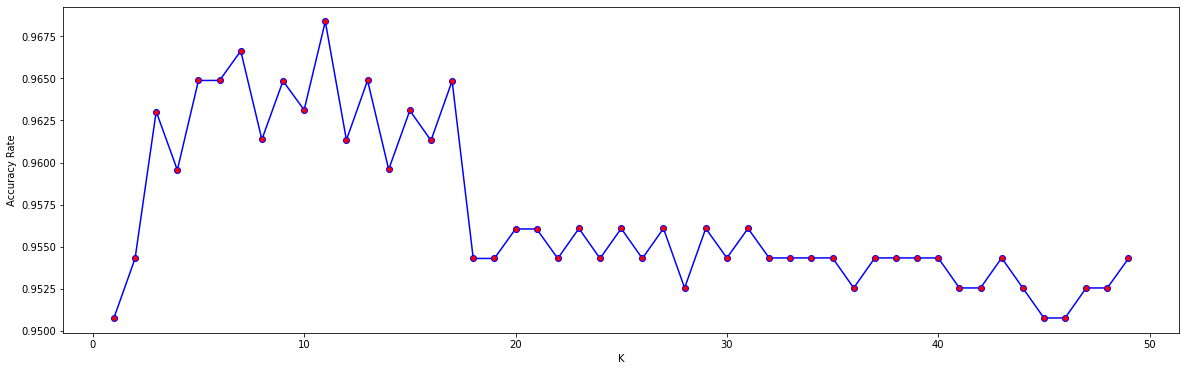

In [ ]:
#Plotting graph between accuracy rate and error rate
plt.figure(figsize=(20,6))
plt.plot(range(1,50),accuracy_rate,color ='blue',marker ='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

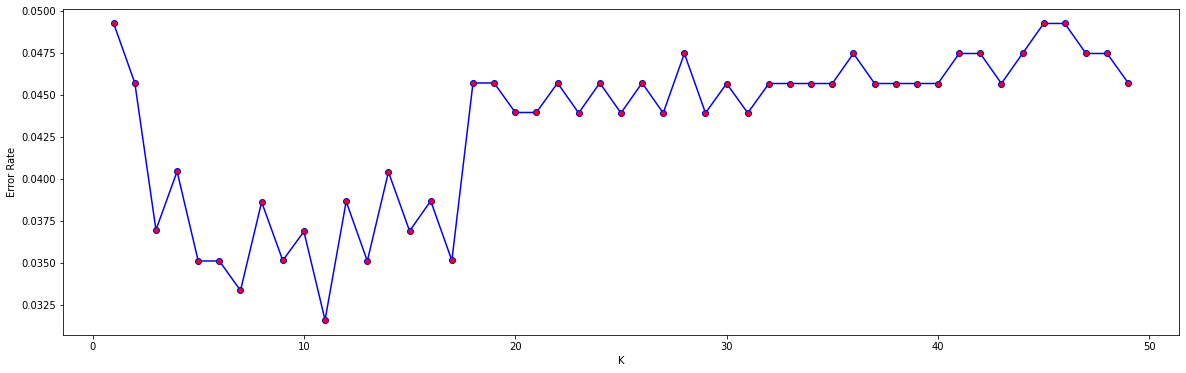

In [ ]:
#Plotting graph between accuracy rate and error rate
plt.figure(figsize=(20,6))
plt.plot(range(1,50),error_rate,color ='blue',marker ='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

*Hence Looking into error rate graph K value can be 31*

In [ ]:
#Now Fitting as per new k value
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(x_train,y_train)
#predictin from test data
y_predicted =  knn.predict(x_test)
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       252
           1       0.97      0.80      0.88       147

    accuracy                           0.92       399
   macro avg       0.93      0.89      0.91       399
weighted avg       0.92      0.92      0.92       399



**Task 3: Iris Dataset task**

In [ ]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
# print(iris)
# iris.feature_names
# iris.target
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['TargetClass'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TargetClass
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Now splitting dependent and independent variable
x = iris_df.iloc[:,0:-1]
y = iris_df['TargetClass']
x,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns], 0      0
 1      0
 2    

In [ ]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.2,random_state = 50)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30, 4), (120, 4), (30,), (120,))

In [ ]:
#Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#predictin from test data
y_predicted =  knn.predict(x_test)
y_predicted

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2,
       1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 0, 1, 1, 1, 2, 1, 2, 1])

In [ ]:
#To check prediction report and find advisable K value
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.90      0.86      0.88        42
           2       0.85      0.90      0.88        39

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



In [ ]:
#Now finding accuracy rate for say 50 k values from 1 to 10: Import cross value score 
from sklearn.model_selection import cross_val_score

feature_df = pd.DataFrame(x,columns=iris_df.columns[:-1]) #For checking accuracy rate and error rate  
accuracy_rate = []
error_rate = []
for i in range(1,10):
  kn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(kn,feature_df,y,cv = 10)
  accuracy_rate.append(score.mean())
for i in range(1,10):
  kn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(kn,feature_df,y,cv = 10)
  error_rate.append(1 - score.mean())

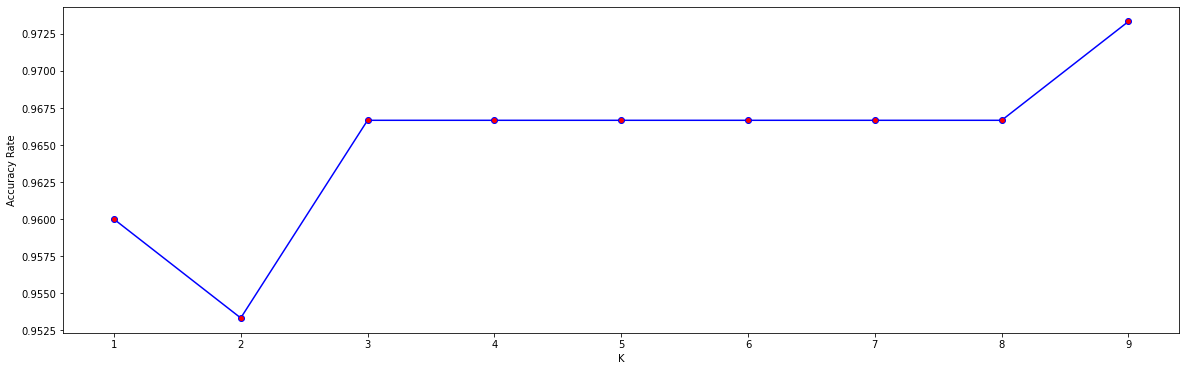

In [ ]:
#Plotting graph between accuracy rate and error rate
plt.figure(figsize=(20,6))
plt.plot(range(1,10),accuracy_rate,color ='blue',marker ='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

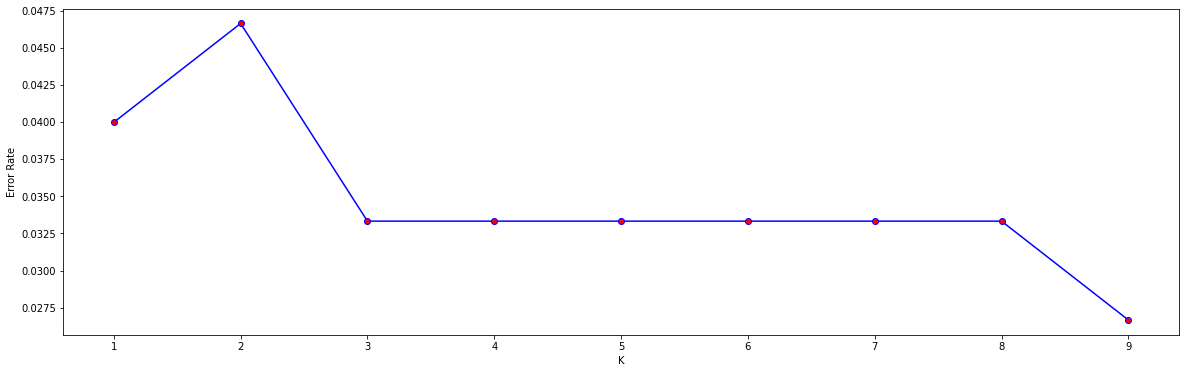

In [ ]:
#Plotting graph between accuracy rate and error rate
plt.figure(figsize=(20,6))
plt.plot(range(1,10),error_rate,color ='blue',marker ='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

*Hence Looking into error rate graph K value can be 3*

In [ ]:
#Now Fitting as per new k value
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
#predictin from test data
y_predicted =  knn.predict(x_test)
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.90      0.86      0.88        42
           2       0.85      0.90      0.88        39

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

